In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN, Birch
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/LNU/2 course/2 semester/Data processing systems/Datasets/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


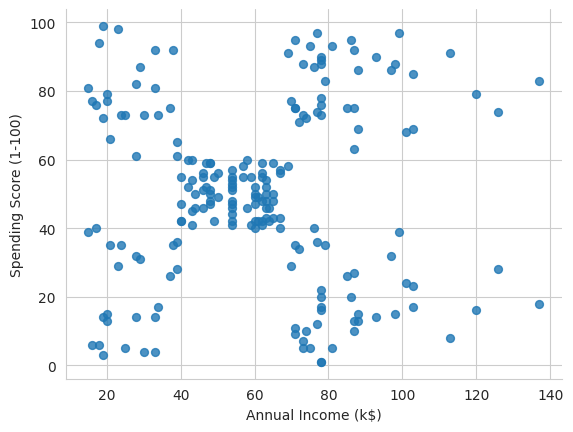

In [ ]:
# @title Annual Income (k$) vs Spending Score (1-100)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
features = []
for feature in df.columns:
  features.append(feature)
features

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [ ]:
df = df.replace({'Genre': {'Female': 0, 'Male': 1}})

In [ ]:
n_clusters=5
X=df[features].values
clusters = KMeans(n_clusters=n_clusters, random_state=10).fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
clusters

array([0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,
       1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2], dtype=int32)

In [ ]:
df['clusters'] = clusters
df['clusters']

0      0
1      0
2      3
3      0
4      0
      ..
195    2
196    4
197    2
198    4
199    2
Name: clusters, Length: 200, dtype: int32

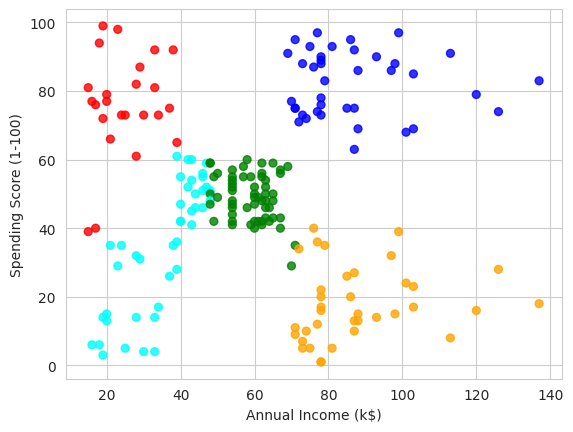

In [ ]:
colors=['red','green','blue','cyan','orange']
color_clusters=[colors[x] for x in  clusters]
df['color_clusters']=color_clusters
_=df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8, c=color_clusters)
plt.show()

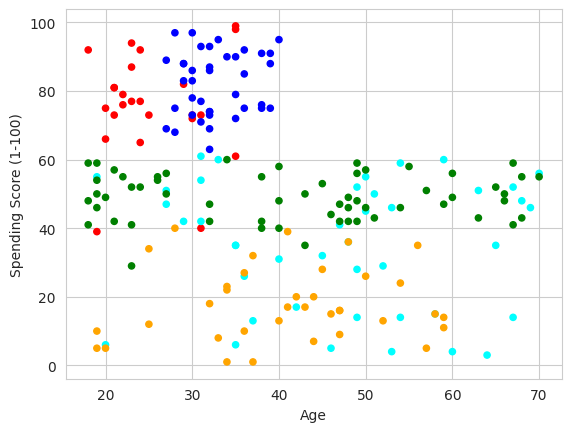

In [ ]:
df_class=df[df.clusters>=0]
_=df_class.plot.scatter(x='Age', y='Spending Score (1-100)',c=df_class.color_clusters)

In [ ]:
n_clusters=5
clustering = AgglomerativeClustering(n_clusters=n_clusters, distance_threshold=None, linkage="ward").fit(X)
clusters_aggl=clustering.labels_

In [ ]:
clusters_aggl

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [ ]:
df['clusters_aggl']=clusters_aggl

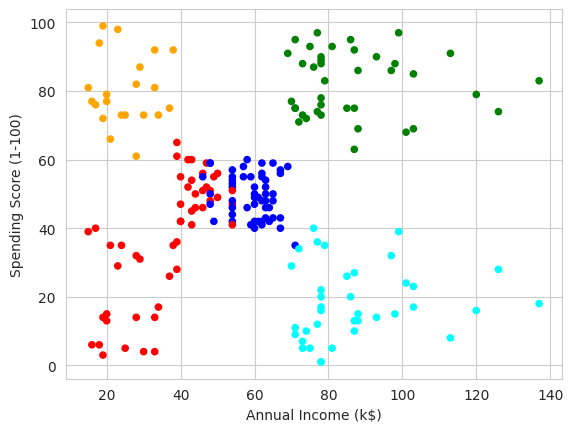

In [ ]:
df['color_clusters_aggl']=[colors[x] for x in  clusters_aggl]
_=df.plot.scatter( x='Annual Income (k$)', y='Spending Score (1-100)',c=[colors[x] for x in  df['clusters_aggl']])

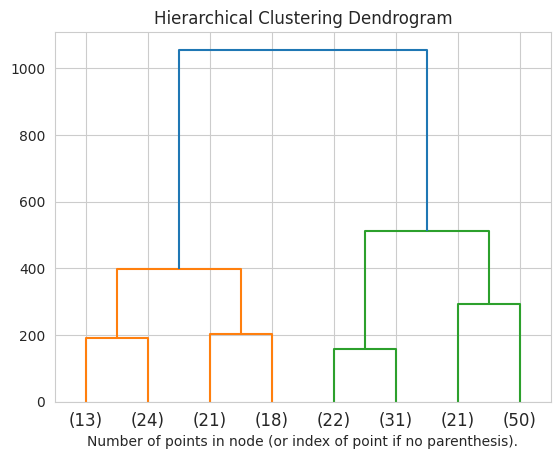

In [ ]:
#https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


X = df[features].values

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=2)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


In [ ]:
#dbscan_X = df.loc[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
dbscan_X = pd.DataFrame()
dbscan_X['Annual Income (k$)'] = df['Annual Income (k$)']
dbscan_X['Spending Score (1-100)'] = df['Spending Score (1-100)']
dbscan_X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
dbscan_clustering = DBSCAN(eps=0.5, min_samples=5).fit(dbscan_X)
df['clusters_dbscan']=dbscan_clustering.labels_

In [ ]:
dbscan_clustering.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

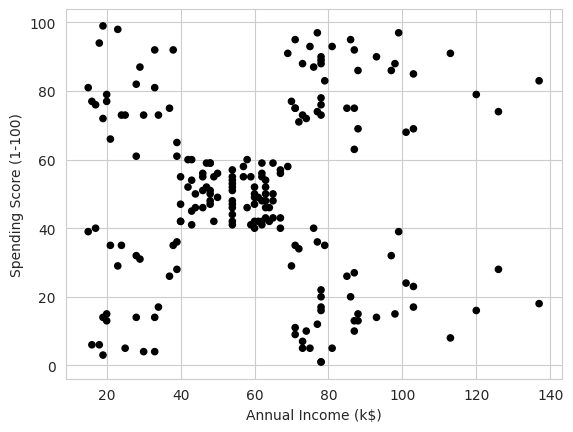

In [ ]:
colors=['red','green','blue','cyan','orange']
_=df.plot.scatter( x='Annual Income (k$)', y='Spending Score (1-100)',\
c=[colors[x] if x >=0 else 'black' for x in  df['clusters_dbscan']])

In [ ]:
X = df[features].values
pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

In [ ]:
X_pca.shape

(200, 2)

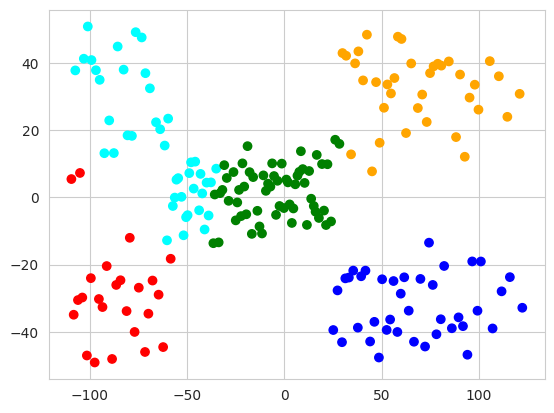

In [ ]:
_=plt.scatter(X_pca[:,0],X_pca[:,1], c=[colors[x] for x in  df['clusters']])

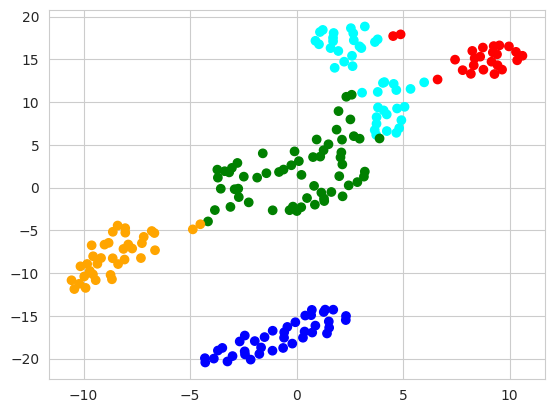

In [ ]:
X_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random', perplexity=25).fit_transform(X)
_=plt.scatter(X_tsne[:,0],X_tsne[:,1], c=[colors[x] for x in  df['clusters']])

In [ ]:
birch_model = Birch(n_clusters=5)  # No pre-specified number of clusters
birch_clusters = birch_model.fit_predict(X)

In [ ]:
birch_clusters

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [ ]:
df['birch_clusters'] = birch_clusters
df['birch_clusters']

0      0
1      4
2      0
3      4
4      0
      ..
195    1
196    3
197    1
198    3
199    1
Name: birch_clusters, Length: 200, dtype: int64

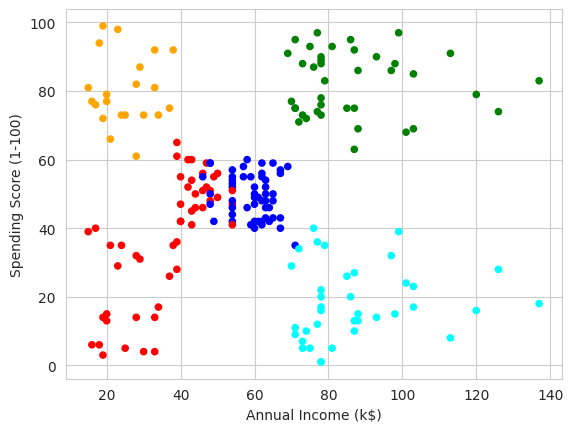

In [ ]:
df['color_birch_clusters']=[colors[x] for x in  birch_clusters]
_=df.plot.scatter( x='Annual Income (k$)', y='Spending Score (1-100)',c=[colors[x] for x in  df['birch_clusters']])

In [ ]:
X = df[features].values
model = GaussianMixture(n_components=5, random_state=10)
gmeans_clusters = model.fit_predict(X)
gmeans_clusters

array([0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 1, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [ ]:
df['gmeans_clusters'] = gmeans_clusters
df['gmeans_clusters']

0      0
1      0
2      3
3      0
4      0
      ..
195    2
196    4
197    2
198    4
199    2
Name: gmeans_clusters, Length: 200, dtype: int64

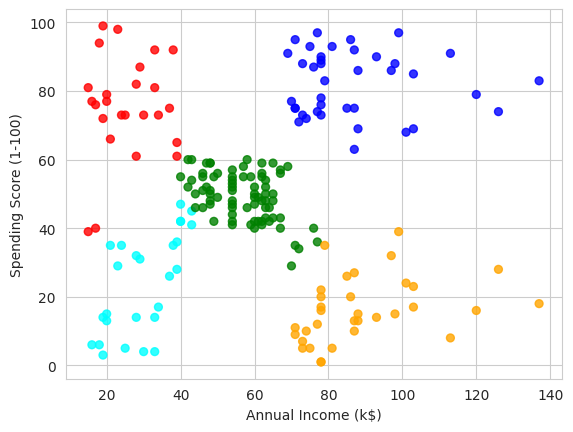

In [ ]:
color_gmeans_clusters=[colors[x] for x in gmeans_clusters]
df['color_gmeans_clusters']=color_gmeans_clusters
_=df.plot(kind='scatter', x='Annual Income (k$)', y='Spending Score (1-100)', s=32, alpha=.8, c=color_gmeans_clusters)
plt.show()